In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
insurance = pd.read_csv('Medical_insurance_dataset.csv')
insurance.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [6]:
insurance.drop(['User ID'], axis= 'columns', inplace= True)

In [7]:
insurance['Purchased'] = insurance['Purchased'].apply(lambda x: 1 if x == 'purchased' else 0)

In [8]:
insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
X = insurance.drop(['Purchased'], axis = 'columns')
y = insurance['Purchased']

In [11]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [12]:
pd.get_dummies(insurance['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [13]:
pd.get_dummies(X)

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [14]:
X = pd.get_dummies(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logisticmodel = LogisticRegression()

logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [18]:
logisticmodel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
logistic_prediction = logisticmodel.predict(X_test)

In [20]:
def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

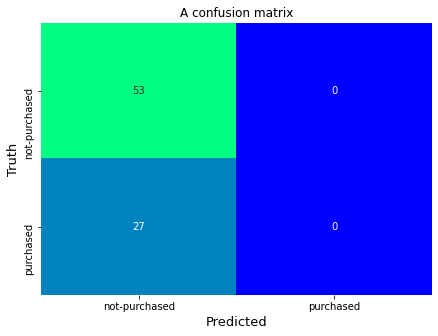

In [21]:
ConfusionMatrix(y_test, logistic_prediction, label= ['not-purchased', 'purchased'])

In [22]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6625

In [23]:
metrics.f1_score(y_test, logistic_prediction)

0.0

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
naivemodel = GaussianNB()

In [26]:
naivemodel.fit(X_train, y_train)

GaussianNB()

In [27]:
naivemodel_prediction = naivemodel.predict(X_test)

In [28]:
naivemodel_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

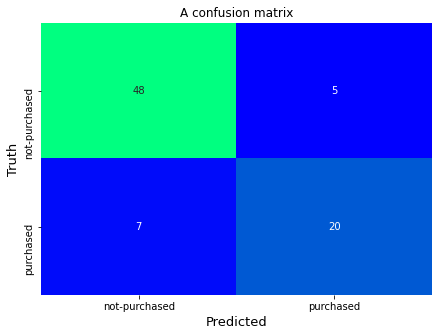

In [29]:
ConfusionMatrix(y_test, naivemodel_prediction, label= ['not-purchased', 'purchased'])

In [30]:
metrics.accuracy_score(y_test, naivemodel_prediction)

0.85

In [31]:
metrics.f1_score(y_test, naivemodel_prediction)

0.7692307692307692

In [32]:
from sklearn.ensemble import RandomForestClassifier

randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [34]:
randomforestmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

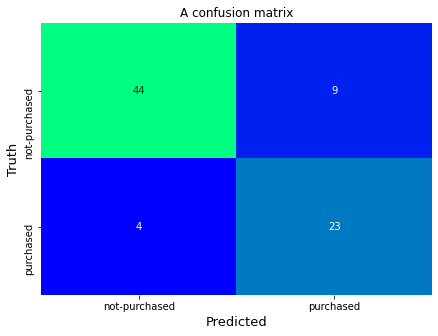

In [35]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label= ['not-purchased', 'purchased'])

In [36]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.8375

In [37]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.7796610169491525

In [38]:
from xgboost import XGBClassifier

xgboostmodel = XGBClassifier(use_label_encoder=False)

xgboostmodel = xgboostmodel.fit(X_train, y_train)

[21:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
xgboostmodel_prediction = xgboostmodel.predict(X_test)

In [40]:
xgboostmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

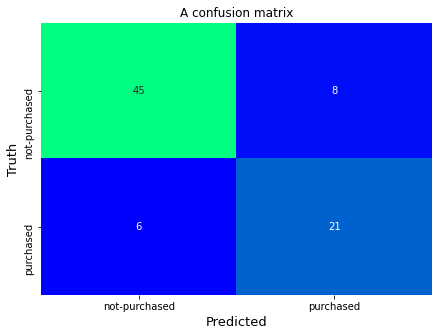

In [41]:
ConfusionMatrix(y_test, xgboostmodel_prediction, label= ['not-purchased', 'purchased'])

In [42]:
metrics.accuracy_score(y_test, xgboostmodel_prediction)

0.825

In [43]:
metrics.f1_score(y_test, xgboostmodel_prediction)

0.75

In [44]:
from sklearn.svm import SVC

SVMmodel = SVC()

SVMmodel.fit(X_train, y_train)

SVC()

In [45]:
SVMmodel_prediction = SVMmodel.predict(X_test)

In [46]:
SVMmodel_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

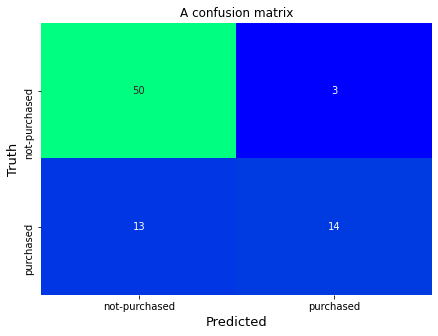

In [47]:
ConfusionMatrix(y_test, SVMmodel_prediction, label= ['not-purchased', 'purchased'])

In [48]:
metrics.accuracy_score(y_test, SVMmodel_prediction)

0.8

In [49]:
metrics.f1_score(y_test, SVMmodel_prediction)

0.6363636363636364

class activity

# K nearest neighbor

In [50]:
from sklearn.neighbors import KNeighborsClassifier

Kneighborsmodel = KNeighborsClassifier()

Kneighborsmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
Kneighborsmodel_prediction = Kneighborsmodel.predict(X_test)

In [52]:
Kneighborsmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

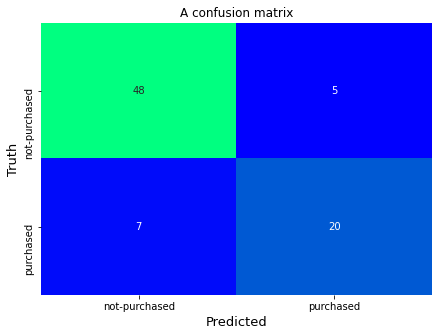

In [53]:
ConfusionMatrix(y_test, Kneighborsmodel_prediction, label= ['not-purchased', 'purchased'])

In [54]:
metrics.accuracy_score(y_test, Kneighborsmodel_prediction)

0.85

In [55]:
metrics.f1_score(y_test, Kneighborsmodel_prediction)

0.7692307692307692

# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier()

dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
dectree_prediction = dectree.predict(X_test)

In [59]:
dectree_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

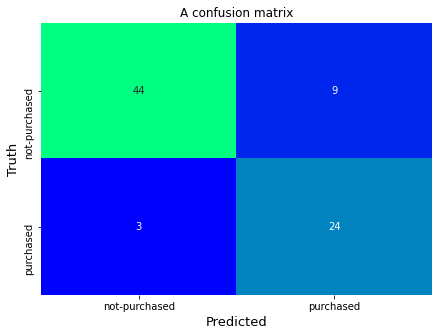

In [60]:
ConfusionMatrix(y_test, dectree_prediction, label= ['not-purchased', 'purchased'])

In [61]:
metrics.accuracy_score(y_test, dectree_prediction)

0.85

In [62]:
metrics.f1_score(y_test, dectree_prediction)

0.7999999999999999

# Gradient Boost Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier()

gradboost.fit(X_train, y_train)

GradientBoostingClassifier()

In [65]:
gradboost_prediction = gradboost.predict(X_test)

In [66]:
gradboost_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

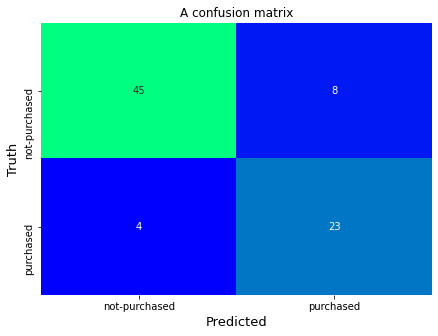

In [67]:
ConfusionMatrix(y_test, gradboost_prediction, label= ['not-purchased', 'purchased'])

In [68]:
metrics.accuracy_score(y_test, gradboost_prediction)

0.85

In [69]:
metrics.f1_score(y_test, gradboost_prediction)

0.7931034482758621

# The best model from the class activity:

DECISION TREES CLASSIFIER